In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point
from shapely import wkb
from shapely import errors
import itertools
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
"""
jan_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-01.parquet').sample(frac=0.035, random_state=1)
feb_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-02.parquet').sample(frac=0.035, random_state=1)
mar_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-03.parquet').sample(frac=0.035, random_state=1)
apr_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-04.parquet').sample(frac=0.035, random_state=1)
may_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-05.parquet').sample(frac=0.035, random_state=1)
jun_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-06.parquet').sample(frac=0.035, random_state=1)
jul_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-07.parquet').sample(frac=0.035, random_state=1)
aug_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-08.parquet').sample(frac=0.035, random_state=1)
sep_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-09.parquet').sample(frac=0.035, random_state=1)
oct_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-10.parquet').sample(frac=0.035, random_state=1)
nov_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-11.parquet').sample(frac=0.035, random_state=1)
dec_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-12.parquet').sample(frac=0.035, random_state=1)
"""

"\njan_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-01.parquet').sample(frac=0.035, random_state=1)\nfeb_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-02.parquet').sample(frac=0.035, random_state=1)\nmar_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-03.parquet').sample(frac=0.035, random_state=1)\napr_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-04.parquet').sample(frac=0.035, random_state=1)\nmay_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-05.parquet').sample(frac=0.035, random_state=1)\njun_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-06.parquet').sample(frac=0.035, random_state=1)\njul_app_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-07.parquet').samp

In [3]:
# read in only the columns and 10% of the samples

from datetime import datetime
import numpy as np
import pandas as pd 
cab = pd.read_parquet("/Users/michaelbrady/Downloads/ny_taxi_2024_data.parquet", columns=[
    "tpep_pickup_datetime", "tpep_dropoff_datetime", "trip_distance", "PULocationID", "DOLocationID", "fare_amount",
    "tolls_amount", "Airport_fee", "congestion_surcharge"]).sample(frac=0.1, random_state=1)
cab

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,tolls_amount,Airport_fee,congestion_surcharge
2424542,2024-07-27 22:08:04,2024-07-27 22:23:46,2.72,161,114,16.30,0.00,0.0,2.5
1497167,2024-05-14 14:08:19,2024-05-14 14:14:12,0.46,239,142,7.20,0.00,0.0,2.5
879974,2024-08-10 14:42:23,2024-08-10 14:53:54,1.30,161,186,11.40,0.00,0.0,2.5
1679930,2024-04-17 10:22:55,2024-04-17 10:49:11,1.41,186,162,21.20,0.00,0.0,2.5
2879769,2024-02-14 09:04:38,2024-02-14 09:49:12,0.00,7,261,53.05,6.94,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1390166,2024-12-12 16:27:31,2024-12-12 16:31:00,0.66,13,231,5.80,0.00,0.0,2.5
1505889,2024-01-18 09:30:01,2024-01-18 09:39:42,0.40,233,162,9.30,0.00,0.0,2.5
466974,2024-09-06 00:34:19,2024-09-06 00:41:33,1.44,144,261,9.30,0.00,0.0,2.5
3423565,2024-12-09 13:49:38,2024-12-09 14:50:49,23.47,10,227,79.35,0.00,NaN,NaN


In [4]:
# set up target class for cab vs. ride share

cab["class"] = 0
cab

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,tolls_amount,Airport_fee,congestion_surcharge,class
2424542,2024-07-27 22:08:04,2024-07-27 22:23:46,2.72,161,114,16.30,0.00,0.0,2.5,0
1497167,2024-05-14 14:08:19,2024-05-14 14:14:12,0.46,239,142,7.20,0.00,0.0,2.5,0
879974,2024-08-10 14:42:23,2024-08-10 14:53:54,1.30,161,186,11.40,0.00,0.0,2.5,0
1679930,2024-04-17 10:22:55,2024-04-17 10:49:11,1.41,186,162,21.20,0.00,0.0,2.5,0
2879769,2024-02-14 09:04:38,2024-02-14 09:49:12,0.00,7,261,53.05,6.94,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1390166,2024-12-12 16:27:31,2024-12-12 16:31:00,0.66,13,231,5.80,0.00,0.0,2.5,0
1505889,2024-01-18 09:30:01,2024-01-18 09:39:42,0.40,233,162,9.30,0.00,0.0,2.5,0
466974,2024-09-06 00:34:19,2024-09-06 00:41:33,1.44,144,261,9.30,0.00,0.0,2.5,0
3423565,2024-12-09 13:49:38,2024-12-09 14:50:49,23.47,10,227,79.35,0.00,NaN,NaN,0


In [5]:
# same as above but with 1% of data (This is only one month of ride-share)

fhv = pd.read_parquet("/Users/michaelbrady/Downloads/fhvhv_tripdata_2024-01.parquet", columns=[
    'pickup_datetime', 'dropoff_datetime', 'trip_miles', 'PULocationID', 'DOLocationID', 
    'base_passenger_fare', 'tolls', "airport_fee", 'congestion_surcharge', 'hvfhs_license_num']
    ).sample(frac=0.50, random_state=1)
fhv = fhv.rename(columns={'hvfhs_license_num': 'class'})
fhv["class"] = 1
fhv

,pickup_datetime,dropoff_datetime,trip_miles,PULocationID,DOLocationID,base_passenger_fare,tolls,airport_fee,congestion_surcharge,class
1549020,2024-01-03 20:25:31,2024-01-03 20:39:43,2.070,47,147,13.91,0.0,0.0,0.00,1
12138095,2024-01-20 13:32:15,2024-01-20 13:35:47,0.774,76,76,8.06,0.0,0.0,0.00,1
7066224,2024-01-12 23:58:09,2024-01-13 00:17:17,3.500,239,236,22.60,0.0,0.0,2.75,1
14531371,2024-01-24 06:24:56,2024-01-24 06:35:22,1.498,78,212,11.52,0.0,0.0,0.00,1
19282271,2024-01-31 11:16:01,2024-01-31 11:34:51,4.330,169,159,17.88,0.0,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
1002276,2024-01-02 18:18:17,2024-01-02 18:33:51,2.600,258,216,14.33,0.0,0.0,0.00,1
15868916,2024-01-26 07:38:57,2024-01-26 07:42:07,0.460,71,71,7.12,0.0,0.0,0.00,1
16511746,2024-01-27 01:05:54,2024-01-27 01:15:51,1.280,100,233,11.83,0.0,0.0,2.75,1
1653763,2024-01-04 05:29:49,2024-01-04 05:41:37,2.300,169,127,12.83,0.0,0.0,0.00,1


In [6]:
fhv["pickup_datetime"].describe()

count                       9831965
mean     2024-01-16 22:22:18.413639
min             2024-01-01 00:00:01
25%             2024-01-09 15:07:14
50%             2024-01-17 08:12:24
75%             2024-01-24 13:28:22
max             2024-01-31 23:59:59
Name: pickup_datetime, dtype: object

In [7]:
# match columns and concat

fhv.columns = cab.columns
df = pd.concat([cab, fhv], ignore_index=True)
df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,tolls_amount,Airport_fee,congestion_surcharge,class
0,2024-07-27 22:08:04,2024-07-27 22:23:46,2.72,161,114,16.30,0.00,0.0,2.50,0
1,2024-05-14 14:08:19,2024-05-14 14:14:12,0.46,239,142,7.20,0.00,0.0,2.50,0
2,2024-08-10 14:42:23,2024-08-10 14:53:54,1.30,161,186,11.40,0.00,0.0,2.50,0
3,2024-04-17 10:22:55,2024-04-17 10:49:11,1.41,186,162,21.20,0.00,0.0,2.50,0
4,2024-02-14 09:04:38,2024-02-14 09:49:12,0.00,7,261,53.05,6.94,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
13948932,2024-01-02 18:18:17,2024-01-02 18:33:51,2.60,258,216,14.33,0.00,0.0,0.00,1
13948933,2024-01-26 07:38:57,2024-01-26 07:42:07,0.46,71,71,7.12,0.00,0.0,0.00,1
13948934,2024-01-27 01:05:54,2024-01-27 01:15:51,1.28,100,233,11.83,0.00,0.0,2.75,1
13948935,2024-01-04 05:29:49,2024-01-04 05:41:37,2.30,169,127,12.83,0.00,0.0,0.00,1


In [8]:
#df["passenger_count"] = df["passenger_count"].fillna(1.0)


In [9]:

#df["passenger_count"] = df["passenger_count"].replace(0.0, 1.0)

In [10]:
#df["passenger_count"].value_counts()

In [11]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,tolls_amount,Airport_fee,congestion_surcharge,class
0,2024-07-27 22:08:04,2024-07-27 22:23:46,2.72,161,114,16.30,0.00,0.0,2.5,0
1,2024-05-14 14:08:19,2024-05-14 14:14:12,0.46,239,142,7.20,0.00,0.0,2.5,0
2,2024-08-10 14:42:23,2024-08-10 14:53:54,1.30,161,186,11.40,0.00,0.0,2.5,0
3,2024-04-17 10:22:55,2024-04-17 10:49:11,1.41,186,162,21.20,0.00,0.0,2.5,0
4,2024-02-14 09:04:38,2024-02-14 09:49:12,0.00,7,261,53.05,6.94,NaN,NaN,0


In [12]:
df["congestion_surcharge"].value_counts()

congestion_surcharge
 0.00    6201771
 2.75    3771504
 2.50    3361207
 0.75     138530
-2.50      49558
 5.50      17657
 1.00          1
Name: count, dtype: int64

In [13]:
df = df[df['congestion_surcharge'].isin([2.5, 0.0])]

In [14]:
#df["mta_tax"].value_counts()

In [15]:
# quick, inprecise handling of outlier values

#df = df[df["mta_tax"].isin([0.50, 0.00])]
df = df[df["trip_distance"] < 100]
df = df.loc[(df["PULocationID"] < 264) & (df["DOLocationID"] < 264)]
df = df.loc[(df["fare_amount"] > 0) & (df["fare_amount"] < 300)]
df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,tolls_amount,Airport_fee,congestion_surcharge,class
0,2024-07-27 22:08:04,2024-07-27 22:23:46,2.720,161,114,16.30,0.00,0.0,2.5,0
1,2024-05-14 14:08:19,2024-05-14 14:14:12,0.460,239,142,7.20,0.00,0.0,2.5,0
2,2024-08-10 14:42:23,2024-08-10 14:53:54,1.300,161,186,11.40,0.00,0.0,2.5,0
3,2024-04-17 10:22:55,2024-04-17 10:49:11,1.410,186,162,21.20,0.00,0.0,2.5,0
5,2024-11-29 18:47:57,2024-11-29 19:01:47,1.250,45,144,12.80,0.00,0.0,2.5,0
...,...,...,...,...,...,...,...,...,...,...
13948931,2024-01-10 07:58:05,2024-01-10 08:29:44,9.247,20,7,38.80,6.67,0.0,0.0,1
13948932,2024-01-02 18:18:17,2024-01-02 18:33:51,2.600,258,216,14.33,0.00,0.0,0.0,1
13948933,2024-01-26 07:38:57,2024-01-26 07:42:07,0.460,71,71,7.12,0.00,0.0,0.0,1
13948935,2024-01-04 05:29:49,2024-01-04 05:41:37,2.300,169,127,12.83,0.00,0.0,0.0,1


In [16]:
# NIK: USE THESE FEATURES

# converting raw datetime to features usable in most ML models

df['time_diff_seconds'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
df['second_of_day'] = (
    df['tpep_pickup_datetime'].dt.hour * 3600 + 
    df['tpep_pickup_datetime'].dt.minute * 60 +  
    df['tpep_pickup_datetime'].dt.second)
df['day_of_year'] = df['tpep_pickup_datetime'].dt.day_of_year

# boolean features for holday and weekend categories

df['is_weekend'] = df['tpep_pickup_datetime'].dt.weekday >= 5

import holidays

# US Holidays
us_holidays = holidays.US()

# Create a boolean holiday column
df['is_holiday'] = df['tpep_pickup_datetime'].apply(lambda x: 1 if x.date() in us_holidays else 0)

df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,tolls_amount,Airport_fee,congestion_surcharge,class,time_diff_seconds,second_of_day,day_of_year,is_weekend,is_holiday
0,2024-07-27 22:08:04,2024-07-27 22:23:46,2.720,161,114,16.30,0.00,0.0,2.5,0,942.0,79684,209,True,0
1,2024-05-14 14:08:19,2024-05-14 14:14:12,0.460,239,142,7.20,0.00,0.0,2.5,0,353.0,50899,135,False,0
2,2024-08-10 14:42:23,2024-08-10 14:53:54,1.300,161,186,11.40,0.00,0.0,2.5,0,691.0,52943,223,True,0
3,2024-04-17 10:22:55,2024-04-17 10:49:11,1.410,186,162,21.20,0.00,0.0,2.5,0,1576.0,37375,108,False,0
5,2024-11-29 18:47:57,2024-11-29 19:01:47,1.250,45,144,12.80,0.00,0.0,2.5,0,830.0,67677,334,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13948931,2024-01-10 07:58:05,2024-01-10 08:29:44,9.247,20,7,38.80,6.67,0.0,0.0,1,1899.0,28685,10,False,0
13948932,2024-01-02 18:18:17,2024-01-02 18:33:51,2.600,258,216,14.33,0.00,0.0,0.0,1,934.0,65897,2,False,0
13948933,2024-01-26 07:38:57,2024-01-26 07:42:07,0.460,71,71,7.12,0.00,0.0,0.0,1,190.0,27537,26,False,0
13948935,2024-01-04 05:29:49,2024-01-04 05:41:37,2.300,169,127,12.83,0.00,0.0,0.0,1,708.0,19789,4,False,0


In [17]:
df["morning_rush_hour"] = ((df["tpep_pickup_datetime"].dt.weekday < 5) & 
                           (df["tpep_pickup_datetime"].dt.hour.between(7, 9))).astype(int)
df["evening_rush_hour"] = ((df["tpep_pickup_datetime"].dt.weekday < 5) & 
                           (df["tpep_pickup_datetime"].dt.hour.between(16, 18))).astype(int)

In [18]:
import seaborn as sns

# check for correlations / collinearity

corr_matrix = df.corr()


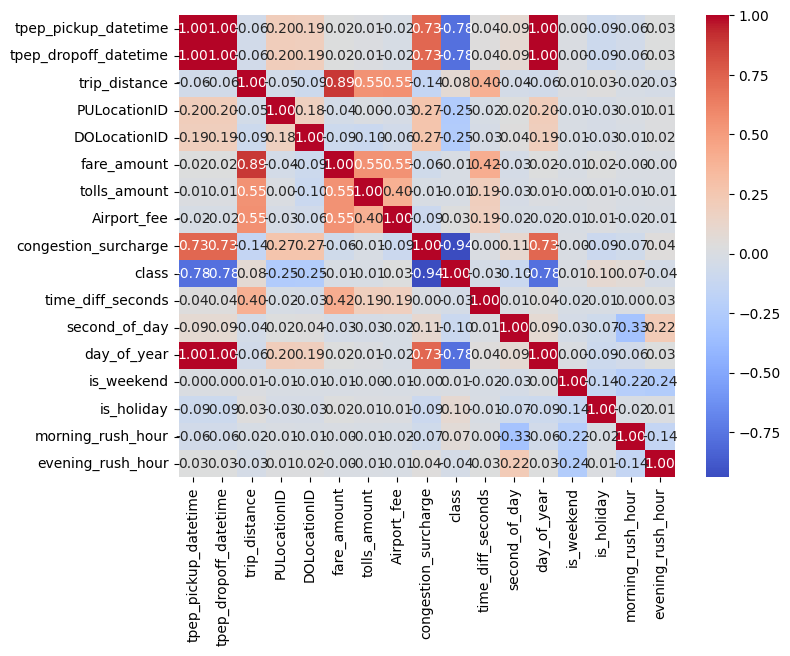

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [20]:
taxi_zone_df = pd.read_csv('https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv')

taxi_zone_df.head(10)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


In [21]:
taxi_zone_df.tail(10)

,LocationID,Borough,Zone,service_zone
255,256,Brooklyn,Williamsburg (South Side),Boro Zone
256,257,Brooklyn,Windsor Terrace,Boro Zone
257,258,Queens,Woodhaven,Boro Zone
258,259,Bronx,Woodlawn/Wakefield,Boro Zone
259,260,Queens,Woodside,Boro Zone
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN
264,265,NaN,Outside of NYC,NaN


In [22]:
taxi_zone_df['service_zone'].value_counts()

service_zone
Boro Zone      205
Yellow Zone     55
Airports         2
EWR              1
Name: count, dtype: int64

In [23]:
# load in geospatial data

zone_long_lat_data = pd.read_parquet('https://data.source.coop/cholmes/nyc-taxi-zones/taxi_zones_4326.parquet')

In [24]:
zone_long_lat_data.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.11635745319,0.00078230679,Newark Airport,1,EWR,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xe8\x00...
1,2,0.43346966679,0.00486634038,Jamaica Bay,2,Queens,b'\x01\x06\x00\x00\x00!\x00\x00\x00\x01\x03\x0...
2,3,0.08434110590,0.00031441416,Allerton/Pelham Gardens,3,Bronx,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00y\x00\x0...
3,4,0.04356652709,0.00011187195,Alphabet City,4,Manhattan,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00X\x00\x0...
4,5,0.09214648986,0.00049795749,Arden Heights,5,Staten Island,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xaa\x00...


In [25]:
zone_long_lat_data["borough"].value_counts()

borough
Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
EWR               1
Name: count, dtype: int64

In [26]:
# borrowed Nik's beautiful code

def safe_wkb_loads(wkb_string):
    try:
        return wkb.loads(wkb_string)
    except errors.WKTReadingError:
        return Point(0,0)

zone_long_lat_data['geometry'] = zone_long_lat_data['geometry'].apply(safe_wkb_loads)

geo_zone = gpd.GeoDataFrame(zone_long_lat_data, geometry=zone_long_lat_data['geometry'], crs="EPSG:4326")

geo_zone_proj = geo_zone.to_crs("EPSG:3857")

geo_zone_proj['centroid'] = geo_zone_proj['geometry'].centroid

In [27]:
"""
# NIK: USE THESE FEATURES
# merging zone data w/ df for PU info

zone_data = zone_long_lat_data[["LocationID", "borough"]]
zone_data = zone_data.copy()
zone_data.loc[:, "PULocationID"] = zone_data["LocationID"]
df_w_zones = df.merge(zone_data, on="PULocationID", how="left")
# f_w_zones = df_w_zones[df_w_zones["borough"] == "Manhattan"]
df_encoded = pd.get_dummies(zone_data['borough'], prefix="PU")
df1 = pd.concat([df_w_zones, df_encoded], axis=1)
df1 = df1.drop(columns=["LocationID", "borough"])
df1
"""

'\n# NIK: USE THESE FEATURES\n# merging zone data w/ df for PU info\n\nzone_data = zone_long_lat_data[["LocationID", "borough"]]\nzone_data = zone_data.copy()\nzone_data.loc[:, "PULocationID"] = zone_data["LocationID"]\ndf_w_zones = df.merge(zone_data, on="PULocationID", how="left")\n# f_w_zones = df_w_zones[df_w_zones["borough"] == "Manhattan"]\ndf_encoded = pd.get_dummies(zone_data[\'borough\'], prefix="PU")\ndf1 = pd.concat([df_w_zones, df_encoded], axis=1)\ndf1 = df1.drop(columns=["LocationID", "borough"])\ndf1\n'

In [28]:
"""
# merging zone data w/ df for DO info

zone_data = zone_long_lat_data[["LocationID", "borough"]]
zone_data = zone_data.copy()  # Ensure you're working with a separate copy
zone_data.loc[:, "DOLocationID"] = zone_data["LocationID"]
df1 = df.merge(zone_data, on="DOLocationID", how="left")
df_encoded_2 = pd.get_dummies(zone_data['borough'], prefix="DO")
df1 = pd.concat([df1, df_encoded_2], axis=1)
df1 = df1.drop(columns=["LocationID", "borough"])
df1
"""

'\n# merging zone data w/ df for DO info\n\nzone_data = zone_long_lat_data[["LocationID", "borough"]]\nzone_data = zone_data.copy()  # Ensure you\'re working with a separate copy\nzone_data.loc[:, "DOLocationID"] = zone_data["LocationID"]\ndf1 = df.merge(zone_data, on="DOLocationID", how="left")\ndf_encoded_2 = pd.get_dummies(zone_data[\'borough\'], prefix="DO")\ndf1 = pd.concat([df1, df_encoded_2], axis=1)\ndf1 = df1.drop(columns=["LocationID", "borough"])\ndf1\n'

In [29]:
# NIK: USE THESE FEATURES
# merging zone data w/ df for PU info + borough one-hot

pu_data = zone_long_lat_data[["LocationID", "borough"]].copy()
pu_data.rename(columns={"LocationID": "PULocationID"}, inplace=True)
pu_dummies = pd.get_dummies(pu_data["borough"], prefix="PU")
pu_data = pd.concat([pu_data, pu_dummies], axis=1).drop(columns=["borough"])
df = df.merge(pu_data, on="PULocationID", how="left")
df = df.drop(columns="PU_EWR") #drop for one-hot
df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,tolls_amount,Airport_fee,congestion_surcharge,class,time_diff_seconds,second_of_day,day_of_year,is_weekend,is_holiday,morning_rush_hour,evening_rush_hour,PU_Bronx,PU_Brooklyn,PU_Manhattan,PU_Queens,PU_Staten Island
0,2024-07-27 22:08:04,2024-07-27 22:23:46,2.720,161,114,16.30,0.00,0.0,2.5,0,942.0,79684,209,True,0,0,0,False,False,True,False,False
1,2024-05-14 14:08:19,2024-05-14 14:14:12,0.460,239,142,7.20,0.00,0.0,2.5,0,353.0,50899,135,False,0,0,0,False,False,True,False,False
2,2024-08-10 14:42:23,2024-08-10 14:53:54,1.300,161,186,11.40,0.00,0.0,2.5,0,691.0,52943,223,True,0,0,0,False,False,True,False,False
3,2024-04-17 10:22:55,2024-04-17 10:49:11,1.410,186,162,21.20,0.00,0.0,2.5,0,1576.0,37375,108,False,0,0,0,False,False,True,False,False
4,2024-11-29 18:47:57,2024-11-29 19:01:47,1.250,45,144,12.80,0.00,0.0,2.5,0,830.0,67677,334,False,0,0,1,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9196808,2024-01-10 07:58:05,2024-01-10 08:29:44,9.247,20,7,38.80,6.67,0.0,0.0,1,1899.0,28685,10,False,0,1,0,True,False,False,False,False
9196809,2024-01-02 18:18:17,2024-01-02 18:33:51,2.600,258,216,14.33,0.00,0.0,0.0,1,934.0,65897,2,False,0,0,1,False,False,False,True,False
9196810,2024-01-26 07:38:57,2024-01-26 07:42:07,0.460,71,71,7.12,0.00,0.0,0.0,1,190.0,27537,26,False,0,1,0,False,True,False,False,False
9196811,2024-01-04 05:29:49,2024-01-04 05:41:37,2.300,169,127,12.83,0.00,0.0,0.0,1,708.0,19789,4,False,0,0,0,True,False,False,False,False


In [30]:
# NIK: USE THESE FEATURES
# merging zone data w/ df for DO info + borough one-hot

do_data = zone_long_lat_data[["LocationID", "borough"]].copy()
do_data.rename(columns={"LocationID": "DOLocationID"}, inplace=True)
do_dummies = pd.get_dummies(do_data["borough"], prefix="DO")
do_data = pd.concat([do_data, do_dummies], axis=1).drop(columns=["borough"])
df = df.merge(do_data, on="DOLocationID", how="left")
df = df.drop(columns="DO_EWR") #drop for one-hot
df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,tolls_amount,Airport_fee,congestion_surcharge,class,time_diff_seconds,second_of_day,day_of_year,is_weekend,is_holiday,morning_rush_hour,evening_rush_hour,PU_Bronx,PU_Brooklyn,PU_Manhattan,PU_Queens,PU_Staten Island,DO_Bronx,DO_Brooklyn,DO_Manhattan,DO_Queens,DO_Staten Island
0,2024-07-27 22:08:04,2024-07-27 22:23:46,2.720,161,114,16.30,0.00,0.0,2.5,0,942.0,79684,209,True,0,0,0,False,False,True,False,False,False,False,True,False,False
1,2024-05-14 14:08:19,2024-05-14 14:14:12,0.460,239,142,7.20,0.00,0.0,2.5,0,353.0,50899,135,False,0,0,0,False,False,True,False,False,False,False,True,False,False
2,2024-08-10 14:42:23,2024-08-10 14:53:54,1.300,161,186,11.40,0.00,0.0,2.5,0,691.0,52943,223,True,0,0,0,False,False,True,False,False,False,False,True,False,False
3,2024-04-17 10:22:55,2024-04-17 10:49:11,1.410,186,162,21.20,0.00,0.0,2.5,0,1576.0,37375,108,False,0,0,0,False,False,True,False,False,False,False,True,False,False
4,2024-11-29 18:47:57,2024-11-29 19:01:47,1.250,45,144,12.80,0.00,0.0,2.5,0,830.0,67677,334,False,0,0,1,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9223169,2024-01-10 07:58:05,2024-01-10 08:29:44,9.247,20,7,38.80,6.67,0.0,0.0,1,1899.0,28685,10,False,0,1,0,True,False,False,False,False,False,False,False,True,False
9223170,2024-01-02 18:18:17,2024-01-02 18:33:51,2.600,258,216,14.33,0.00,0.0,0.0,1,934.0,65897,2,False,0,0,1,False,False,False,True,False,False,False,False,True,False
9223171,2024-01-26 07:38:57,2024-01-26 07:42:07,0.460,71,71,7.12,0.00,0.0,0.0,1,190.0,27537,26,False,0,1,0,False,True,False,False,False,False,True,False,False,False
9223172,2024-01-04 05:29:49,2024-01-04 05:41:37,2.300,169,127,12.83,0.00,0.0,0.0,1,708.0,19789,4,False,0,0,0,True,False,False,False,False,False,False,True,False,False


In [31]:
df1 = df

In [32]:
gdf = geo_zone_proj
gdf

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,centroid
0,1,0.11635745319,0.00078230679,Newark Airport,1,EWR,"POLYGON ((-8258175.509 4967457.2, -8258306.757...",POINT (-8257011.847 4966992.844)
1,2,0.43346966679,0.00486634038,Jamaica Bay,2,Queens,"MULTIPOLYGON (((-8217980.649 4959237.189, -821...",POINT (-8218862.517 4955975.362)
2,3,0.08434110590,0.00031441416,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((-8220713.532 4993383.076, -8220788.1...",POINT (-8220657.463 4992372.04)
3,4,0.04356652709,0.00011187195,Alphabet City,4,Manhattan,"POLYGON ((-8234500.209 4971984.014, -8234499.4...",POINT (-8235078.417 4971680.104)
4,5,0.09214648986,0.00049795749,Arden Heights,5,Staten Island,"POLYGON ((-8257036.153 4948033.072, -8257110.7...",POINT (-8258624.297 4946581.381)
...,...,...,...,...,...,...,...,...
258,259,0.12675030519,0.00039455249,Woodlawn/Wakefield,259,Bronx,"POLYGON ((-8221063.631 4999130.391, -8221105.5...",POINT (-8221191.032 4997298.294)
259,260,0.13351415464,0.00042234533,Woodside,260,Queens,"POLYGON ((-8226705.587 4977119.784, -8226761.1...",POINT (-8227212.351 4974689.406)
260,261,0.02712045636,0.00003434232,World Trade Center,261,Manhattan,"POLYGON ((-8239125.755 4968930.583, -8239128.7...",POINT (-8239091.983 4969533.877)
261,262,0.04906362315,0.00012233027,Yorkville East,262,Manhattan,"MULTIPOLYGON (((-8231389.771 4980365.914, -823...",POINT (-8231687.853 4979347.657)


In [33]:
# pulling useful data out of "geometry" column

gdf["centroid_x"] = gdf.geometry.centroid.x
gdf["centroid_y"] = gdf.geometry.centroid.y
gdf["area"] = gdf.geometry.area
gdf["perimeter"] = gdf.geometry.length


In [34]:
# limiting geometry features to centroids for now

gdf = gdf.loc[:, ["centroid_x", "centroid_y", "LocationID"]]
gdf

,centroid_x,centroid_y,LocationID
0,-8.257012e+06,4.966993e+06,1
1,-8.218863e+06,4.955975e+06,2
2,-8.220657e+06,4.992372e+06,3
3,-8.235078e+06,4.971680e+06,4
4,-8.258624e+06,4.946581e+06,5
...,...,...,...
258,-8.221191e+06,4.997298e+06,259
259,-8.227212e+06,4.974689e+06,260
260,-8.239092e+06,4.969534e+06,261
261,-8.231688e+06,4.979348e+06,262


In [35]:
# # NIK: USE THESE FEATURES
# merging geospatial w/ df
# note: these are not lat/long, they are another system, equally (if not better) for ML.

gdf["PULocationID"] = gdf["LocationID"]
df1 = df1.merge(gdf.rename(columns={"centroid_x": "PUx", "centroid_y": "PUy"}), 
                on="PULocationID", how="left")

gdf["DOLocationID"] = gdf["LocationID"]
df1 = df1.merge(gdf.rename(columns={"centroid_x": "DOx", "centroid_y": "DOy"}), 
                on="DOLocationID", how="left")

df1


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID_x,DOLocationID,fare_amount,tolls_amount,Airport_fee,congestion_surcharge,class,time_diff_seconds,second_of_day,day_of_year,is_weekend,is_holiday,morning_rush_hour,evening_rush_hour,PU_Bronx,PU_Brooklyn,PU_Manhattan,PU_Queens,PU_Staten Island,DO_Bronx,DO_Brooklyn,DO_Manhattan,DO_Queens,DO_Staten Island,PUx,PUy,LocationID_x,DOx,DOy,LocationID_y,PULocationID_y
0,2024-07-27 22:08:04,2024-07-27 22:23:46,2.720,161,114,16.30,0.00,0.0,2.5,0,942.0,79684,209,True,0,0,0,False,False,True,False,False,False,False,True,False,False,-8.235160e+06,4.976716e+06,161.0,-8.237351e+06,4.972354e+06,114.0,114.0
1,2024-05-14 14:08:19,2024-05-14 14:14:12,0.460,239,142,7.20,0.00,0.0,2.5,0,353.0,50899,135,False,0,0,0,False,False,True,False,False,False,False,True,False,False,-8.235264e+06,4.980528e+06,239.0,-8.235586e+06,4.979010e+06,142.0,142.0
2,2024-08-10 14:42:23,2024-08-10 14:53:54,1.300,161,186,11.40,0.00,0.0,2.5,0,691.0,52943,223,True,0,0,0,False,False,True,False,False,False,False,True,False,False,-8.235160e+06,4.976716e+06,161.0,-8.236800e+06,4.975315e+06,186.0,186.0
3,2024-04-17 10:22:55,2024-04-17 10:49:11,1.410,186,162,21.20,0.00,0.0,2.5,0,1576.0,37375,108,False,0,0,0,False,False,True,False,False,False,False,True,False,False,-8.236800e+06,4.975315e+06,186.0,-8.234565e+06,4.976519e+06,162.0,162.0
4,2024-11-29 18:47:57,2024-11-29 19:01:47,1.250,45,144,12.80,0.00,0.0,2.5,0,830.0,67677,334,False,0,0,1,False,False,True,False,False,False,False,True,False,False,-8.237437e+06,4.970021e+06,45.0,-8.237299e+06,4.971260e+06,144.0,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9337641,2024-01-10 07:58:05,2024-01-10 08:29:44,9.247,20,7,38.80,6.67,0.0,0.0,1,1899.0,28685,10,False,0,1,0,True,False,False,False,False,False,False,False,True,False,-8.224937e+06,4.991387e+06,20.0,-8.228703e+06,4.977225e+06,7.0,7.0
9337642,2024-01-02 18:18:17,2024-01-02 18:33:51,2.600,258,216,14.33,0.00,0.0,0.0,1,934.0,65897,2,False,0,0,1,False,False,False,True,False,False,False,False,True,False,-8.221586e+06,4.966536e+06,258.0,-8.217545e+06,4.964691e+06,216.0,216.0
9337643,2024-01-26 07:38:57,2024-01-26 07:42:07,0.460,71,71,7.12,0.00,0.0,0.0,1,190.0,27537,26,False,0,1,0,False,True,False,False,False,False,True,False,False,False,-8.230737e+06,4.960015e+06,71.0,-8.230737e+06,4.960015e+06,71.0,71.0
9337644,2024-01-04 05:29:49,2024-01-04 05:41:37,2.300,169,127,12.83,0.00,0.0,0.0,1,708.0,19789,4,False,0,0,0,True,False,False,False,False,False,False,True,False,False,-8.227081e+06,4.990103e+06,169.0,-8.228660e+06,4.992608e+06,127.0,127.0


In [36]:

df1 = df1.drop(columns=["LocationID_x", "LocationID_y", "PULocationID_x", "PULocationID_x", "PULocationID_y", "DOLocationID"])

df1


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,tolls_amount,Airport_fee,congestion_surcharge,class,time_diff_seconds,second_of_day,day_of_year,is_weekend,is_holiday,morning_rush_hour,evening_rush_hour,PU_Bronx,PU_Brooklyn,PU_Manhattan,PU_Queens,PU_Staten Island,DO_Bronx,DO_Brooklyn,DO_Manhattan,DO_Queens,DO_Staten Island,PUx,PUy,DOx,DOy
0,2024-07-27 22:08:04,2024-07-27 22:23:46,2.720,16.30,0.00,0.0,2.5,0,942.0,79684,209,True,0,0,0,False,False,True,False,False,False,False,True,False,False,-8.235160e+06,4.976716e+06,-8.237351e+06,4.972354e+06
1,2024-05-14 14:08:19,2024-05-14 14:14:12,0.460,7.20,0.00,0.0,2.5,0,353.0,50899,135,False,0,0,0,False,False,True,False,False,False,False,True,False,False,-8.235264e+06,4.980528e+06,-8.235586e+06,4.979010e+06
2,2024-08-10 14:42:23,2024-08-10 14:53:54,1.300,11.40,0.00,0.0,2.5,0,691.0,52943,223,True,0,0,0,False,False,True,False,False,False,False,True,False,False,-8.235160e+06,4.976716e+06,-8.236800e+06,4.975315e+06
3,2024-04-17 10:22:55,2024-04-17 10:49:11,1.410,21.20,0.00,0.0,2.5,0,1576.0,37375,108,False,0,0,0,False,False,True,False,False,False,False,True,False,False,-8.236800e+06,4.975315e+06,-8.234565e+06,4.976519e+06
4,2024-11-29 18:47:57,2024-11-29 19:01:47,1.250,12.80,0.00,0.0,2.5,0,830.0,67677,334,False,0,0,1,False,False,True,False,False,False,False,True,False,False,-8.237437e+06,4.970021e+06,-8.237299e+06,4.971260e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9337641,2024-01-10 07:58:05,2024-01-10 08:29:44,9.247,38.80,6.67,0.0,0.0,1,1899.0,28685,10,False,0,1,0,True,False,False,False,False,False,False,False,True,False,-8.224937e+06,4.991387e+06,-8.228703e+06,4.977225e+06
9337642,2024-01-02 18:18:17,2024-01-02 18:33:51,2.600,14.33,0.00,0.0,0.0,1,934.0,65897,2,False,0,0,1,False,False,False,True,False,False,False,False,True,False,-8.221586e+06,4.966536e+06,-8.217545e+06,4.964691e+06
9337643,2024-01-26 07:38:57,2024-01-26 07:42:07,0.460,7.12,0.00,0.0,0.0,1,190.0,27537,26,False,0,1,0,False,True,False,False,False,False,True,False,False,False,-8.230737e+06,4.960015e+06,-8.230737e+06,4.960015e+06
9337644,2024-01-04 05:29:49,2024-01-04 05:41:37,2.300,12.83,0.00,0.0,0.0,1,708.0,19789,4,False,0,0,0,True,False,False,False,False,False,False,True,False,False,-8.227081e+06,4.990103e+06,-8.228660e+06,4.992608e+06


In [38]:
# rename columns for easier reference

df1.columns = [["PUtime", "DOtime", "distance", "fare", "tolls", "airport", "congestion", "class", 
    "duration(sec)", "second_of_day", "day_of_year", "weekend", "holiday", "morning_rush", "evening_rush",
    "PU_Bronx", "PU_Brooklyn", "PU_Manhattan", "PU_Queens", "PU_Staten Island", 
    "DO_Bronx", "DO_Brooklyn", "DO_Manhattan", "DO_Queens", "DO_Staten Island", 
    "PUx", "PUy", "DOx", "DOy"]
]
df1.head()

,PUtime,DOtime,distance,fare,tolls,airport,congestion,class,duration(sec),second_of_day,day_of_year,weekend,holiday,morning_rush,evening_rush,PU_Bronx,PU_Brooklyn,PU_Manhattan,PU_Queens,PU_Staten Island,DO_Bronx,DO_Brooklyn,DO_Manhattan,DO_Queens,DO_Staten Island,PUx,PUy,DOx,DOy
0,2024-07-27 22:08:04,2024-07-27 22:23:46,2.72,16.3,0.0,0.0,2.5,0,942.0,79684,209,True,0,0,0,False,False,True,False,False,False,False,True,False,False,-8.235160e+06,4.976716e+06,-8.237351e+06,4.972354e+06
1,2024-05-14 14:08:19,2024-05-14 14:14:12,0.46,7.2,0.0,0.0,2.5,0,353.0,50899,135,False,0,0,0,False,False,True,False,False,False,False,True,False,False,-8.235264e+06,4.980528e+06,-8.235586e+06,4.979010e+06
2,2024-08-10 14:42:23,2024-08-10 14:53:54,1.30,11.4,0.0,0.0,2.5,0,691.0,52943,223,True,0,0,0,False,False,True,False,False,False,False,True,False,False,-8.235160e+06,4.976716e+06,-8.236800e+06,4.975315e+06
3,2024-04-17 10:22:55,2024-04-17 10:49:11,1.41,21.2,0.0,0.0,2.5,0,1576.0,37375,108,False,0,0,0,False,False,True,False,False,False,False,True,False,False,-8.236800e+06,4.975315e+06,-8.234565e+06,4.976519e+06
4,2024-11-29 18:47:57,2024-11-29 19:01:47,1.25,12.8,0.0,0.0,2.5,0,830.0,67677,334,False,0,0,1,False,False,True,False,False,False,False,True,False,False,-8.237437e+06,4.970021e+06,-8.237299e+06,4.971260e+06


In [ ]:
# NIK, Take a look at this example to asses similarities and differences

# example of dataframe for ML modeling (prescaling, incomplete features, etc.)

example_partial_unscaled_df_for_ML = df1[["second_of_day", "day_of_year", "weekend", "holiday", "PUx", "PUy", "DOx", "DOy", 
                                          "distance", "duration(sec)", "fare", "tolls", "airport", "congestion", "class",  "PU_Bronx", "PU_Brooklyn", 
                                          "PU_Manhattan", "PU_Queens", "PU_Staten Island", 
                                          "DO_Bronx", "DO_Brooklyn", "DO_Manhattan", "DO_Queens", "DO_Staten Island", ]]
example_partial_unscaled_df_for_ML

,second_of_day,day_of_year,weekend,holiday,PUx,PUy,DOx,DOy,distance,duration(sec),fare,tolls,airport,congestion,class,PU_Bronx,PU_Brooklyn,PU_Manhattan,PU_Queens,PU_Staten Island,DO_Bronx,DO_Brooklyn,DO_Manhattan,DO_Queens,DO_Staten Island
0,79684,209,True,0,-8.235160e+06,4.976716e+06,-8.237351e+06,4.972354e+06,2.720,942.0,16.30,0.00,0.0,2.5,0,False,False,True,False,False,False,False,True,False,False
1,50899,135,False,0,-8.235264e+06,4.980528e+06,-8.235586e+06,4.979010e+06,0.460,353.0,7.20,0.00,0.0,2.5,0,False,False,True,False,False,False,False,True,False,False
2,52943,223,True,0,-8.235160e+06,4.976716e+06,-8.236800e+06,4.975315e+06,1.300,691.0,11.40,0.00,0.0,2.5,0,False,False,True,False,False,False,False,True,False,False
3,37375,108,False,0,-8.236800e+06,4.975315e+06,-8.234565e+06,4.976519e+06,1.410,1576.0,21.20,0.00,0.0,2.5,0,False,False,True,False,False,False,False,True,False,False
4,67677,334,False,0,-8.237437e+06,4.970021e+06,-8.237299e+06,4.971260e+06,1.250,830.0,12.80,0.00,0.0,2.5,0,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9337641,28685,10,False,0,-8.224937e+06,4.991387e+06,-8.228703e+06,4.977225e+06,9.247,1899.0,38.80,6.67,0.0,0.0,1,True,False,False,False,False,False,False,False,True,False
9337642,65897,2,False,0,-8.221586e+06,4.966536e+06,-8.217545e+06,4.964691e+06,2.600,934.0,14.33,0.00,0.0,0.0,1,False,False,False,True,False,False,False,False,True,False
9337643,27537,26,False,0,-8.230737e+06,4.960015e+06,-8.230737e+06,4.960015e+06,0.460,190.0,7.12,0.00,0.0,0.0,1,False,True,False,False,False,False,True,False,False,False
9337644,19789,4,False,0,-8.227081e+06,4.990103e+06,-8.228660e+06,4.992608e+06,2.300,708.0,12.83,0.00,0.0,0.0,1,True,False,False,False,False,False,False,True,False,False


END OF REAL WORK - STOP READING

In [ ]:
distances = []
for (index1, row1), (index2, row2) in itertools.product(geo_zone_proj.iterrows(), geo_zone_proj.iterrows()):
    distance_meters = row1['centroid'].distance(row2['centroid'])
    distance_miles = distance_meters * 0.000621371
    distances.append({
        'PULocationID': index1,
        'DOLocationID': index2,
        'distance_miles': distance_miles
    })

distance_result_df = pd.DataFrame(distances)

distance_result_df.tail(30)

,PULocationID,DOLocationID,distance_miles
69139,262,233,4.445282
69140,262,234,7.163396
69141,262,235,0.442310
69142,262,236,1.372202
69143,262,237,1.929047
69144,262,238,1.968708
69145,262,239,11.616964
69146,262,240,9.722155
69147,262,241,9.317373
69148,262,242,7.270111


In [ ]:
df = df.merge(distance_result_df, on=['PULocationID', 'DOLocationID'], how='left')
df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,tolls_amount,Airport_fee,congestion_surcharge,class,time_diff_seconds,second_of_day,day_of_year,is_weekend,is_holiday,distance_miles
0,2024-07-27 22:08:04,2024-07-27 22:23:46,2.720,161,114,16.30,0.00,0.0,2.5,0,942.0,79684,209,True,0,14.964141
1,2024-05-14 14:08:19,2024-05-14 14:14:12,0.460,239,142,7.20,0.00,0.0,2.5,0,353.0,50899,135,False,0,13.078988
2,2024-08-10 14:42:23,2024-08-10 14:53:54,1.300,161,186,11.40,0.00,0.0,2.5,0,691.0,52943,223,True,0,16.528708
3,2024-04-17 10:22:55,2024-04-17 10:49:11,1.410,186,162,21.20,0.00,0.0,2.5,0,1576.0,37375,108,False,0,16.792431
4,2024-11-29 18:47:57,2024-11-29 19:01:47,1.250,45,144,12.80,0.00,0.0,2.5,0,830.0,67677,334,False,0,14.935738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169914,2024-01-10 07:58:05,2024-01-10 08:29:44,9.247,20,7,38.80,6.67,0.0,0.0,1,1899.0,28685,10,False,0,16.690679
9169915,2024-01-02 18:18:17,2024-01-02 18:33:51,2.600,258,216,14.33,0.00,0.0,0.0,1,934.0,65897,2,False,0,19.195010
9169916,2024-01-26 07:38:57,2024-01-26 07:42:07,0.460,71,71,7.12,0.00,0.0,0.0,1,190.0,27537,26,False,0,0.000000
9169917,2024-01-04 05:29:49,2024-01-04 05:41:37,2.300,169,127,12.83,0.00,0.0,0.0,1,708.0,19789,4,False,0,11.989577


In [ ]:
df.loc[500000:500020]

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,tolls_amount,Airport_fee,congestion_surcharge,class,time_diff_seconds,second_of_day,day_of_year,is_weekend,is_holiday,distance_miles
500000,2024-09-08 00:58:37,2024-09-08 01:04:57,2.10,79,232,10.7,0.00,0.00,2.5,0,380.0,3517,252,True,0,3.919238
500001,2024-08-29 10:58:55,2024-08-29 11:16:45,1.82,170,114,16.3,0.00,0.00,2.5,0,1070.0,39535,242,False,0,23.638104
500002,2024-04-30 11:37:23,2024-04-30 11:55:11,1.80,141,163,16.3,0.00,0.00,2.5,0,1068.0,41843,121,False,0,2.302101
500003,2024-06-07 23:09:26,2024-06-07 23:17:37,0.62,249,79,8.6,0.00,0.00,2.5,0,491.0,83366,159,False,0,12.282596
500004,2024-07-12 21:26:42,2024-07-12 21:41:01,2.30,233,144,14.9,0.00,0.00,2.5,0,859.0,77202,194,False,0,2.911788
500005,2024-07-26 19:00:26,2024-07-26 19:07:18,0.62,186,246,7.9,0.00,0.00,2.5,0,412.0,68426,208,False,0,23.664673
500006,2024-01-02 16:44:09,2024-01-02 16:49:04,0.80,166,166,7.2,0.00,0.00,0.0,0,295.0,60249,2,False,0,0.000000
500007,2024-06-14 21:34:49,2024-06-14 21:50:47,2.02,79,170,15.6,0.00,0.00,2.5,0,958.0,77689,166,False,0,10.043248
500008,2024-06-21 21:29:21,2024-06-21 22:12:21,17.67,132,164,70.0,6.94,1.75,2.5,0,2580.0,77361,173,False,0,2.238007
500009,2024-12-30 05:50:48,2024-12-30 06:03:58,8.23,263,138,31.7,6.94,0.00,2.5,0,790.0,21048,365,False,0,NaN


In [ ]:
df['percentage_difference'] = (abs(df['trip_distance'] - df['distance_miles']) / df[['trip_distance', 'distance_miles']].max(axis=1)) * 100

df_major_diff = df[df['percentage_difference'] > 50]

df_major_diff

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,fare_amount,tolls_amount,Airport_fee,congestion_surcharge,class,time_diff_seconds,second_of_day,day_of_year,is_weekend,is_holiday,distance_miles,percentage_difference
0,2024-07-27 22:08:04,2024-07-27 22:23:46,2.72,161,114,16.30,0.0,0.0,2.5,0,942.0,79684,209,True,0,14.964141,81.823213
1,2024-05-14 14:08:19,2024-05-14 14:14:12,0.46,239,142,7.20,0.0,0.0,2.5,0,353.0,50899,135,False,0,13.078988,96.482908
2,2024-08-10 14:42:23,2024-08-10 14:53:54,1.30,161,186,11.40,0.0,0.0,2.5,0,691.0,52943,223,True,0,16.528708,92.134896
3,2024-04-17 10:22:55,2024-04-17 10:49:11,1.41,186,162,21.20,0.0,0.0,2.5,0,1576.0,37375,108,False,0,16.792431,91.603360
4,2024-11-29 18:47:57,2024-11-29 19:01:47,1.25,45,144,12.80,0.0,0.0,2.5,0,830.0,67677,334,False,0,14.935738,91.630812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169911,2024-01-20 11:46:29,2024-01-20 11:51:23,0.82,255,255,8.88,0.0,0.0,0.0,1,294.0,42389,20,True,0,0.000000,100.000000
9169912,2024-01-03 20:22:59,2024-01-03 20:25:46,0.56,36,37,7.98,0.0,0.0,0.0,1,167.0,73379,3,False,0,12.913405,95.663421
9169915,2024-01-02 18:18:17,2024-01-02 18:33:51,2.60,258,216,14.33,0.0,0.0,0.0,1,934.0,65897,2,False,0,19.195010,86.454813
9169916,2024-01-26 07:38:57,2024-01-26 07:42:07,0.46,71,71,7.12,0.0,0.0,0.0,1,190.0,27537,26,False,0,0.000000,100.000000


In [ ]:
df_distance = df[["trip_distance", "distance_miles", "time_diff_seconds"]]
df_distance.loc[:, "trip_hours"] = df["time_diff_seconds"] / 60 / 60
df_distance = df_distance.drop(columns="time_diff_seconds")
df_distance["mph_data"] = df_distance["trip_distance"] / df_distance["trip_hours"]
df_distance["mph_centroids"] = df_distance["distance_miles"] / df_distance["trip_hours"]


/var/folders/vt/jy8dcmxj29vfz95p7lls9h1m0000gn/T/ipykernel_72766/27538720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distance.loc[:, "trip_hours"] = df["time_diff_seconds"] / 60 / 60


In [ ]:
# Cenroid distances won't work. Here's why:

df_distance.loc[500000:500020]

,trip_distance,distance_miles,trip_hours,mph_data,mph_centroids
500000,2.10,3.919238,0.105556,19.894737,37.129621
500001,1.82,23.638104,0.297222,6.123364,79.530070
500002,1.80,2.302101,0.296667,6.067416,7.759891
500003,0.62,12.282596,0.136389,4.545825,90.055696
500004,2.30,2.911788,0.238611,9.639115,12.203069
500005,0.62,23.664673,0.114444,5.417476,206.778694
500006,0.80,0.000000,0.081944,9.762712,0.000000
500007,2.02,10.043248,0.266111,7.590814,37.740807
500008,17.67,2.238007,0.716667,24.655814,3.122800
500009,8.23,NaN,0.219444,37.503797,NaN


In [ ]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(gdf)

# Apply PCA
pca = PCA(n_components=4) 
location_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame
location_pca = pd.DataFrame(location_pca, columns=["PC1", "PCA", "PC3", "PC4"])

location_pca


,PC1,PCA,PC3,PC4
0,-2.726748,-1.480123,1.710926,-7.272311e-31
1,-2.529332,0.508179,-1.391526,-2.220446e-16
2,-1.825535,2.280761,0.808104,-7.272311e-31
3,-2.356425,0.226667,0.554088,-7.272311e-31
4,-3.066511,-2.671319,0.638217,-2.220446e-16
...,...,...,...,...
258,2.860700,1.330723,0.638264,2.220446e-16
259,2.379171,-0.258049,-0.269270,2.220446e-16
260,2.175086,-1.330948,0.202379,2.220446e-16
261,2.459158,-0.325482,0.283510,2.220446e-16


In [ ]:
pca.explained_variance_ratio_


array([5.14203036e-01, 3.42834703e-01, 1.42962261e-01, 2.36242038e-17])

In [ ]:
centroid_df = gdf.loc[:, ["centroid_x", "centroid_y"]]

In [ ]:
scaler = StandardScaler()
centroid_scaled = scaler.fit_transform(centroid_df)

pca2 = PCA(n_components=1) 
centroid_pca = pca2.fit_transform(centroid_scaled)

centroid_pca = pd.DataFrame(centroid_pca, columns=["PC1"])

centroid_pca

,PC1
0,-2.077309
1,-0.165317
2,1.770564
3,-0.355709
4,-3.336935
...,...
258,2.013279
259,0.336716
260,-0.743497
261,0.302454


In [ ]:
pca2.explained_variance_ratio_

array([0.70672888])

In [ ]:
'''
pass_impute = df1.drop(columns=["start_time", "end_time", "rating"])
pass_impute
'''

'\npass_impute = df1.drop(columns=["start_time", "end_time", "rating"])\npass_impute\n'

In [ ]:
rows_to_fill = pass_impute["pass_count"].isnull()|(pass_impute["pass_count"] == 0.0)
rows_to_fill

NameError: name 'pass_impute' is not defined

In [ ]:
train_data = pass_impute[~rows_to_fill]
test_data = pass_impute[rows_to_fill]
train_data

,vendor,pass_count,trip_dist,fare,tip,elapsed
0,2,1.0,1.72,17.7,0.00,1188.0
1,1,1.0,1.80,10.0,3.75,396.0
2,1,1.0,4.70,23.3,3.00,1075.0
3,1,1.0,1.40,10.0,2.00,498.0
4,1,1.0,0.80,7.9,3.20,366.0
...,...,...,...,...,...,...
3342075,2,1.0,1.90,12.1,1.88,564.0
3342076,2,1.0,3.88,19.1,0.00,835.0
3342077,2,1.0,5.53,29.6,2.00,1567.0
3342078,2,1.0,0.89,9.3,2.14,509.0


In [ ]:
train_data.isnull().value_counts()

vendor  pass_count  trip_dist  fare   tip    elapsed
False   False       False      False  False  False      36677134
Name: count, dtype: int64

In [ ]:
X = train_data.drop(columns=["pass_count", "vendor"])
y = train_data["pass_count"]
X

,trip_dist,fare,tip,elapsed
0,1.72,17.7,0.00,1188.0
1,1.80,10.0,3.75,396.0
2,4.70,23.3,3.00,1075.0
3,1.40,10.0,2.00,498.0
4,0.80,7.9,3.20,366.0
...,...,...,...,...
3342075,1.90,12.1,1.88,564.0
3342076,3.88,19.1,0.00,835.0
3342077,5.53,29.6,2.00,1567.0
3342078,0.89,9.3,2.14,509.0


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = np.round(rf.predict(X_test))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE is {mse}")
print(f"RMSE is {rmse}")

MSE is 0.8255478856379992
RMSE is 0.9085966572896904


In [ ]:
y_train_pred = np.round(rf.predict(X_train))

In [ ]:
t_mse = mean_squared_error(y_train, y_train_pred)
t_rmse = np.sqrt(t_mse)
print(f"Training MSE is {t_mse}")
print(f"Training RMSE is {t_rmse}")

Training MSE is 0.8152429426215435
Training RMSE is 0.9029080477111406


In [ ]:
features = ["trip_dist", "fare", "tip", "elapsed"]


pass_preds = np.round(rf.predict(test_data[features]))
pass_impute.loc[rows_to_fill, "pass_count"] = pass_preds

pass_impute


,vendor,pass_count,trip_dist,fare,tip,elapsed
0,1,1.0,1.30,8.60,2.70,294.0
1,1,1.0,1.10,7.20,3.00,186.0
2,2,1.0,0.86,7.90,0.00,362.0
3,2,1.0,0.82,7.90,1.29,349.0
4,1,1.0,4.90,25.40,0.00,1239.0
...,...,...,...,...,...,...
3582623,2,1.0,4.27,14.27,0.00,755.0
3582624,1,1.0,0.00,14.00,3.80,859.0
3582625,2,1.0,6.44,30.00,0.00,1949.0
3582626,2,1.0,3.88,22.32,5.26,1071.0


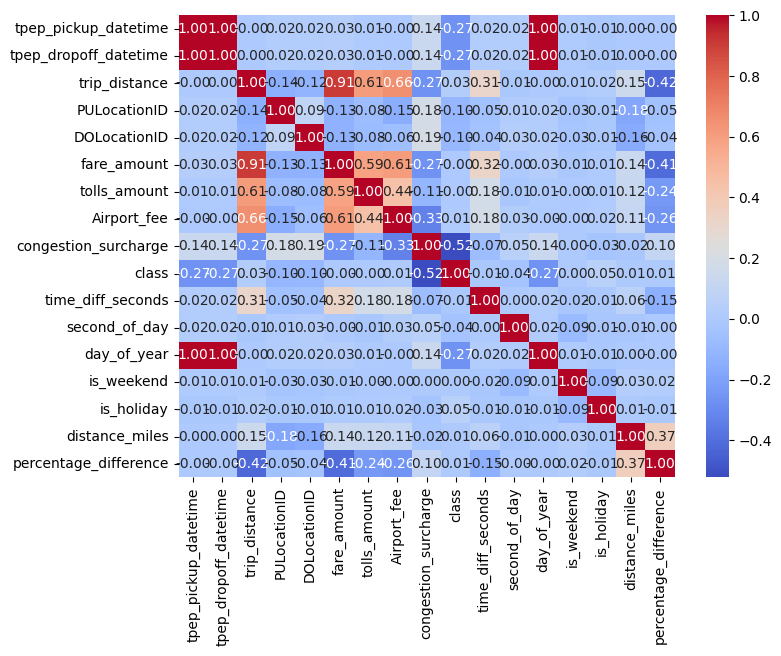

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
pass_preds = pd.Series(pass_preds)

In [ ]:
pass_impute["pass_count"].value_counts()

pass_count
1.0    2901003
2.0     453897
3.0     108003
4.0      64899
5.0      32700
6.0      22107
8.0         10
7.0          6
9.0          3
Name: count, dtype: int64

In [ ]:
importances = rf.feature_importances_
feature_names = X_train.columns
sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)


[('fare', np.float64(0.5214024703650676)),
 ('trip_dist', np.float64(0.21525327824004914)),
 ('tip', np.float64(0.14742461401647455)),
 ('elapsed', np.float64(0.11591963737840869))]

In [ ]:
# Drop vendor column
# Try adding start_time as hour and/or weekend column

In [ ]:
pass_preds.value_counts()

count
466562    1
Name: count, dtype: int64